In [1]:
# Southwest Atlantic analysis
# Plots surface vel, EKE and a vertical section of meridional vel for 3 diff resolutions of ACCESS-OM2
# 06 Mar 2019

#%matplotlib inline
%pylab inline

import cosima_cookbook as cc
import numpy as np
import matplotlib.pyplot as plt # to generate plots
import xarray as xr
import scipy as sp
import pandas as pd
import IPython.display
import cmocean as cm
import cartopy.crs as ccrs
import cartopy.feature as cft
import netCDF4 as nc
import matplotlib.gridspec as gridspec

from mpl_toolkits.basemap import Basemap # plot on map projections
from glob import glob
import scipy.interpolate
import scipy.ndimage
from tqdm import tqdm_notebook
import IPython.display

# for georefferenced data
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.cm as cm # for colormap

from dask.distributed import Client, progress

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata



Populating the interactive namespace from numpy and matplotlib
netcdf_index loaded.


In [2]:
# In one terminal run: dask-scheduler (make sure cosima modules are loaded)
# In another terminal run: 
# dask-worker tcp://10.0.64.3:8786 --memory-limit 4e9 --nprocs 6 --nthreads 1 --local-directory /local/w97/gsp599
# where XX will be provided in the first terminal, and YYYZZZ is your NCI login 
# (for more information on this see figures/dynamic_topo/PacificSSHTrends.ipynb)

client = Client('tcp://10.0.64.3:8786', local_dir='/local/w97/gsp599')
client

Client Scheduler: tcp://10.0.64.3:8786 Dashboard: http://10.0.64.3:8787/status,Cluster Workers: 6 Cores: 6 Memory: 24.00 GB


In [3]:
# List of experiments to compare
EXP = ['1deg_jra55v13_iaf_spinup1_B1','025deg_jra55v13_iaf_gmredi6','01deg_jra55v13_iaf']
ncfile = ['ocean.nc','ocean.nc','ocean.nc']
n_files = [-12, -34, None] 

reg = [-60,-30,-60,-30]; # Argentine Basin, [S N W E]
DEPTH = 0;



In [4]:
# 1 deg
ii = 0;
exp = EXP[ii] 
print(exp)

## Load zonal velocity from experiment
u = cc.get_nc_variable(exp, ncfile[ii], 'u',n=n_files[ii]).sel(st_ocean=DEPTH,method='nearest').\
    sel(yu_ocean=slice(reg[0],reg[1])).sel(xu_ocean=slice(reg[2],reg[3])).load() 
um = u.mean('time')

## Load meridional velocity from expt
v = cc.get_nc_variable(exp, ncfile[ii], 'v',n=n_files[ii]).sel(st_ocean=DEPTH,method='nearest').\
    sel(yu_ocean=slice(reg[0],reg[1])).sel(xu_ocean=slice(reg[2],reg[3])).load() 
vm = v.mean('time')
vel_mean_1deg = np.sqrt(um**2+vm**2)

## Calculates EKE
u_prime = (u - um)*100
v_prime = (v - vm)*100
EKE = (u_prime**2 + v_prime**2)/2
EKE_mean_1deg = EKE.mean(axis=0)

# SLA std
#sea_level = cc.get_nc_variable(exp,'ocean_month.nc','sea_level',n=n_files[ii]).\
#    sel(yt_ocean=slice(reg[0],reg[1])).sel(xt_ocean=slice(reg[2],reg[3])).mean('time') 
#sea_levelsq = cc.get_nc_variable(exp,'ocean_month.nc','sea_levelsq',n=n_files[ii]).\
#    sel(yt_ocean=slice(reg[0],reg[1])).sel(xt_ocean=slice(reg[2],reg[3])).mean('time') 
#sla_rms_1deg = (sea_levelsq - sea_level**(2.0))**(0.5)
#sla_rms_1deg.load()


1deg_jra55v13_iaf_spinup1_B1
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [7]:
# 025 deg
ii = 1;
exp = EXP[ii] 
print(exp)

## Load zonal velocity from experiment
u = cc.get_nc_variable(exp, ncfile[ii], 'u',n=n_files[ii]).sel(st_ocean=DEPTH,method='nearest').\
    sel(yu_ocean=slice(reg[0],reg[1])).sel(xu_ocean=slice(reg[2],reg[3])).load() 
um = u.mean('time')

## Load meridional velocity from expt
v = cc.get_nc_variable(exp, ncfile[ii], 'v',n=n_files[ii]).sel(st_ocean=DEPTH,method='nearest').\
    sel(yu_ocean=slice(reg[0],reg[1])).sel(xu_ocean=slice(reg[2],reg[3])).load() 
vm = v.mean('time')
vel_mean_025deg = np.sqrt(um**2+vm**2)

## Calculates EKE
u_prime = (u - um)*100
v_prime = (v - vm)*100
EKE = (u_prime**2 + v_prime**2)/2
EKE_mean_025deg = EKE.mean(axis=0)

# SLA std
#sea_level = cc.get_nc_variable(exp,'ocean_month.nc','sea_level',n=n_files[ii]).\
#    sel(yt_ocean=slice(reg[0],reg[1])).sel(xt_ocean=slice(reg[2],reg[3])).mean('time') 
#sea_levelsq = cc.get_nc_variable(exp,'ocean_month.nc','sea_levelsq',n=n_files[ii]).\
#    sel(yt_ocean=slice(reg[0],reg[1])).sel(xt_ocean=slice(reg[2],reg[3])).mean('time') 
#sla_rms_025deg = (sea_levelsq - sea_level**(2.0))**(0.5)
#sla_rms_025deg.load()

025deg_jra55v13_iaf_gmredi6
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [8]:
# 01 deg
ii = 2;
exp = EXP[ii] 
print(exp)
#Surf vel
u = cc.get_nc_variable(exp, ncfile[ii], 'u',n=n_files[ii]).sel(st_ocean=DEPTH,method='nearest').\
    sel(yu_ocean=slice(reg[0],reg[1])).sel(xu_ocean=slice(reg[2],reg[3])).load() 
um = u.mean('time')
v = cc.get_nc_variable(exp, ncfile[ii], 'v',n=n_files[ii]).sel(st_ocean=DEPTH,method='nearest').\
    sel(yu_ocean=slice(reg[0],reg[1])).sel(xu_ocean=slice(reg[2],reg[3])).load() 
vm = v.mean('time')
vel_mean_01deg = np.sqrt(um**2+vm**2)

## Calculates EKE
u_prime = (u - um)*100
v_prime = (v - vm)*100
EKE = (u_prime**2 + v_prime**2)/2
EKE_mean_01deg = EKE.mean(axis=0)

# SLA std
#sea_level = cc.get_nc_variable(exp,'ocean_month.nc','sea_level',n=n_files[ii]).\
#    sel(yt_ocean=slice(reg[0],reg[1])).sel(xt_ocean=slice(reg[2],reg[3])).mean('time') 
#sea_levelsq = cc.get_nc_variable(exp,'ocean_month.nc','sea_levelsq',n=n_files[ii]).\
#    sel(yt_ocean=slice(reg[0],reg[1])).sel(xt_ocean=slice(reg[2],reg[3])).mean('time') 
#sla_rms_01deg = (sea_levelsq - sea_level**(2.0))**(0.5)
#sla_rms_01deg.load()

01deg_jra55v13_iaf
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


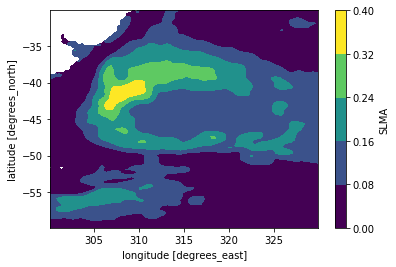

In [28]:
# OBS - SLMA
aviso_file = '/g/data3/hh5/tmp/cosima/observations/original/AVISO_Mean_Std/aviso_ssh_monthly_anom_clim9314_GMSLtrend_removed.timstd.nc'
sea_level_obs = xr.open_dataset(aviso_file).SLMA.mean('TAXM')
sea_level_obs_bc = sea_level_obs.sel(LAT=slice(reg[0],reg[1])).sel(LON=slice(reg[2]+360,reg[3]+360)) 
sea_level_obs_bc.plot.contourf()

# OBS: drifter velocities (Laurindo et al., 2017)
obs_file = xr.open_dataset('/g/data3/hh5/tmp/cosima/observations/original/drifter_annualmeans.nc').\
           rename({'Lat':'latitude','Lon':'longitude'})
obs_u = obs_file['U']
obs_v = obs_file['V']
obs_vel = np.sqrt(obs_u**2+obs_v**2)
obs_vel_bc = obs_vel.sel(latitude=slice(reg[0],reg[1])).sel(longitude=slice(reg[2],reg[3])) 

# EKE
EKEobs = xr.open_dataset('/g/data/w97/gsp599/cosima-recipes-master/Tutorials/meanEKE.nc')
#plt.contourf(EKEobs.X,EKEobs.Y,EKEobs.meanEKE)



/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  s)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  s)


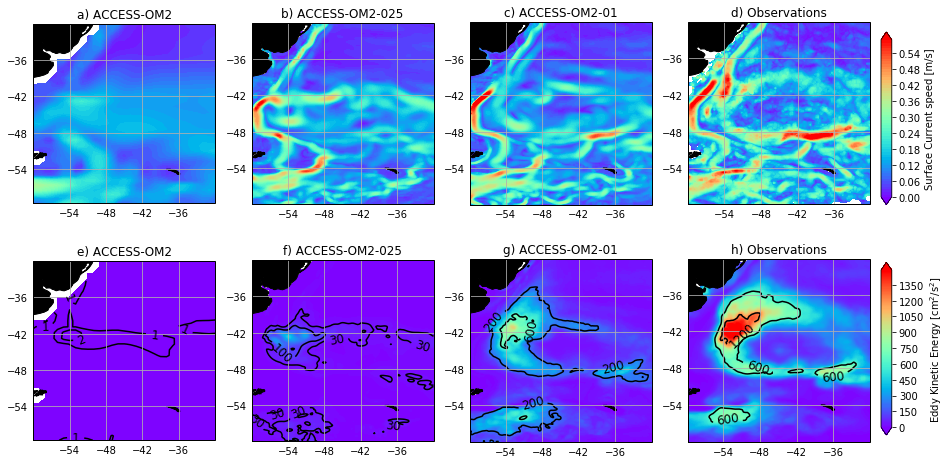

In [45]:
# Plotting
ftszSLA = 12
ftszTITLE = 12

plt.figure(figsize=(15,8))
cmp = plt.get_cmap('rainbow')
clev1 = np.arange(0,0.6,0.01)
#clev2 = np.arange(0,0.3,0.01)
clev2 = np.arange(0,1500,10)

land_50m = cft.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='black',
                                        facecolor='black',linewidth=0.5)

sub1 = [1,2,3,4]
sub2 = [5,6,7,8]
flvel = ['vel_mean_1deg','vel_mean_025deg','vel_mean_01deg','obs_vel_bc']
#flsla = ['sla_rms_1deg','sla_rms_025deg','sla_rms_01deg','sea_level_obs_bc']
flsla = ['EKE_mean_1deg','EKE_mean_025deg','EKE_mean_01deg','EKE_obs']
tit1 = ['a) ACCESS-OM2','b) ACCESS-OM2-025','c) ACCESS-OM2-01','d) Observations']
tit2 = ['e) ACCESS-OM2','f) ACCESS-OM2-025','g) ACCESS-OM2-01','h) Observations']
LEVELS = ([1,2],[30,100],[200,600],[600,1200])

for ii in [0,1,2]:
    # Surf Curr
    ax = plt.subplot(2,4,sub1[ii],projection=ccrs.PlateCarree(central_longitude=-100))
    ax.coastlines(resolution='50m')
    ax.add_feature(land_50m)
    gl = ax.gridlines(draw_labels=False)
    gl.xlabels_bottom = True
    gl.ylabels_left = True
    p2 = eval(flvel[ii]).plot.contourf(cmap=cmp,levels=clev1,add_colorbar=False,extend='both',transform=ccrs.PlateCarree())
    plt.title(tit1[ii])
    # SLA std
    ax = plt.subplot(2,4,sub2[ii],projection=ccrs.PlateCarree(central_longitude=-100))
    ax.coastlines(resolution='50m')
    ax.add_feature(land_50m)
    gl = ax.gridlines(draw_labels=False)
    gl.xlabels_bottom = True
    gl.ylabels_left = True
    p2 = eval(flsla[ii]).plot.contourf(cmap=cmp,levels=clev2,add_colorbar=False,extend='both',transform=ccrs.PlateCarree())
    p3 = eval(flsla[ii]).plot.contour(colors='k',levels=LEVELS[ii],add_colorbar=False,extend='max',transform=ccrs.PlateCarree())
    plt.clabel(p3, inline=True, fmt='%1.0f', fontsize=ftszSLA, colors='k')
    plt.title(tit2[ii])

# Surf Curr from drifters
ax = plt.subplot(2,4,4,projection=ccrs.PlateCarree(central_longitude=-100))
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
gl = ax.gridlines(draw_labels=False)
gl.xlabels_bottom = True
gl.ylabels_left = True
p1 = swapaxes(obs_vel_bc,0,1).plot.contourf(cmap=cmp,levels=clev1,add_colorbar=False,extend='both',transform=ccrs.PlateCarree())
p1.cmap.set_over(color=cmp(255), alpha=None)
plt.title(tit1[3])

ax1 = plt.axes([0.91,0.55,0.01,0.3])
cb = plt.colorbar(p1,cax=ax1,orientation='vertical',pad=.05)
cb.ax.set_ylabel('Surface Current speed [m/s]')

# AVISO EKE
ax = plt.subplot(2,4,8,projection=ccrs.PlateCarree(central_longitude=-100))
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
gl = ax.gridlines(draw_labels=False)
gl.xlabels_bottom = True
gl.ylabels_left = True
p2 = plt.contourf(EKEobs.X,EKEobs.Y,EKEobs.meanEKE,cmap=cmp,levels=clev2,add_colorbar=False,extend='both',transform=ccrs.PlateCarree())
#p2 = eval(flsla[3]).plot.contourf(cmap=cmp,levels=clev2,add_colorbar=False,extend='both',transform=ccrs.PlateCarree())
p3 = plt.contour(EKEobs.X,EKEobs.Y,EKEobs.meanEKE,colors='k',levels=[600,1200],add_colorbar=False,extend='max',transform=ccrs.PlateCarree())
plt.clabel(p3, inline=True, fmt='%1.0f', fontsize=ftszSLA, colors='k')
plt.title(tit2[3])

ax2 = plt.axes([0.91,0.15,0.01,0.3])
cb = plt.colorbar(p2,cax=ax2,orientation='vertical',pad=.05)
#cb.ax.set_ylabel('Sea Level std [m]')
cb.ax.set_ylabel('Eddy Kinetic Energy [cm$^{2}$/s$^{2}$]')


figdir = '/g/data/w97/gsp599/figures/'
figname = 'SW_Atlantic_cosima_EKE.pdf'
plt.savefig(os.path.join(figdir, figname),dpi=300, bbox_inches="tight")  # comment out to disable saving
  


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  s)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  s)


<a list of 5 text.Text objects>

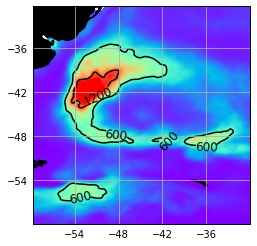

In [44]:
LEVELS = ([1,2],[30,100],[200,600],[600,1200])


# AVISO EKE
ax = plt.subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=-100))
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
gl = ax.gridlines(draw_labels=False)
gl.xlabels_bottom = True
gl.ylabels_left = True
p2 = plt.contourf(EKEobs.X,EKEobs.Y,EKEobs.meanEKE,cmap=cmp,levels=clev2,add_colorbar=False,extend='both',transform=ccrs.PlateCarree())
p3 = plt.contour(EKEobs.X,EKEobs.Y,EKEobs.meanEKE,colors='k',levels=[600,1200],add_colorbar=False,extend='max',transform=ccrs.PlateCarree())
plt.clabel(p3, inline=True, fmt='%1.0f', fontsize=ftszSLA, colors='k')
   


[3, 4]